# WMI607: AI and Machine Learning Take-Home Exam
## Section G: Dataset Generation & Entropy Computation (Questions 7-12)

---



In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

## Question 7: Dataset Generation

**Task**: Generate a unique dataset of 24 instances with 3 categorical features and 1 binary class label.

In [2]:
# =============================================================================
STUDENT_ID = 12739498 
# =============================================================================

print(f"Student ID (Random Seed): {STUDENT_ID}")

# Set the random seed using student ID
np.random.seed(STUDENT_ID)

Student ID (Random Seed): 12739498


In [3]:
# Define feature values (each feature has 2-3 possible values)
# Feature justification based on infrastructure monitoring domain (related to MSc project)

# Feature 1: Configuration State - relates to drift detection scenarios
feature1_values = ['Compliant', 'Modified', 'Unknown']
feature1_name = 'Config_State'

# Feature 2: Resource Type - type of cloud resource being monitored
feature2_values = ['Compute', 'Storage', 'Network']
feature2_name = 'Resource_Type'

# Feature 3: Change Frequency - how often the resource changes
feature3_values = ['Low', 'High']
feature3_name = 'Change_Freq'

# Class label: Whether anomaly/drift was detected
class_values = ['No', 'Yes']
class_name = 'Anomaly_Detected'

print("Feature Definitions:")
print(f"  {feature1_name}: {feature1_values}")
print(f"  {feature2_name}: {feature2_values}")
print(f"  {feature3_name}: {feature3_values}")
print(f"  {class_name}: {class_values}")

Feature Definitions:
  Config_State: ['Compliant', 'Modified', 'Unknown']
  Resource_Type: ['Compute', 'Storage', 'Network']
  Change_Freq: ['Low', 'High']
  Anomaly_Detected: ['No', 'Yes']


In [4]:
# Generate 24 random instances
n_instances = 24

data = {
    feature1_name: np.random.choice(feature1_values, n_instances),
    feature2_name: np.random.choice(feature2_values, n_instances),
    feature3_name: np.random.choice(feature3_values, n_instances),
    class_name: np.random.choice(class_values, n_instances)
}

# Create DataFrame
df = pd.DataFrame(data)

# Add instance numbers for reference
df.insert(0, 'Instance', range(1, n_instances + 1))

print(f"\n{'='*60}")
print("GENERATED DATASET (24 Instances)")
print(f"{'='*60}")
print(f"\nRandom Seed (Student ID): {STUDENT_ID}\n")
print(df.to_string(index=False))


GENERATED DATASET (24 Instances)

Random Seed (Student ID): 12739498

 Instance Config_State Resource_Type Change_Freq Anomaly_Detected
        1     Modified       Compute         Low              Yes
        2     Modified       Storage        High              Yes
        3      Unknown       Storage         Low              Yes
        4     Modified       Compute         Low              Yes
        5      Unknown       Storage        High              Yes
        6    Compliant       Compute         Low              Yes
        7    Compliant       Network         Low               No
        8     Modified       Storage        High               No
        9    Compliant       Network         Low              Yes
       10      Unknown       Network         Low               No
       11     Modified       Network        High              Yes
       12      Unknown       Storage        High               No
       13      Unknown       Compute        High              Yes
     

In [5]:
# Feature choice justification
print(f"""
{'='*60}
FEATURE CHOICE JUSTIFICATION
{'='*60}

The features are designed to align with my MSc project on Cloud Infrastructure Drift Detection:

1. {feature1_name} ({feature1_values}):
   - Represents the configuration state of a cloud resource
   - 'Compliant' = matches expected IaC definition
   - 'Modified' = has been changed from expected state
   - 'Unknown' = state could not be determined

2. {feature2_name} ({feature2_values}):
   - Type of cloud infrastructure resource
   - Different resources have different drift patterns
   - Relevant to multi-resource drift detection systems

3. {feature3_name} ({feature3_values}):
   - Frequency of configuration changes
   - High-frequency changes may indicate automated processes
   - Low-frequency changes may warrant more scrutiny

4. {class_name} (Binary: Yes/No):
   - Whether an anomaly/drift was detected
   - The target variable for classification
""")


FEATURE CHOICE JUSTIFICATION

The features are designed to align with my MSc project on Cloud Infrastructure Drift Detection:

1. Config_State (['Compliant', 'Modified', 'Unknown']):
   - Represents the configuration state of a cloud resource
   - 'Compliant' = matches expected IaC definition
   - 'Modified' = has been changed from expected state
   - 'Unknown' = state could not be determined

2. Resource_Type (['Compute', 'Storage', 'Network']):
   - Type of cloud infrastructure resource
   - Different resources have different drift patterns
   - Relevant to multi-resource drift detection systems

3. Change_Freq (['Low', 'High']):
   - Frequency of configuration changes
   - High-frequency changes may indicate automated processes
   - Low-frequency changes may warrant more scrutiny

4. Anomaly_Detected (Binary: Yes/No):
   - Whether an anomaly/drift was detected
   - The target variable for classification



In [7]:
# Dataset statistics
print(f"\n{'='*60}")
print("DATASET STATISTICS")
print(f"{'='*60}\n")

for col in [feature1_name, feature2_name, feature3_name, class_name]:
    print(f"{col} Distribution:")
    counts = df[col].value_counts()
    for val, count in counts.items():
        print(f"  {val}: {count} ({count/n_instances*100:.1f}%)")
    print()


DATASET STATISTICS

Config_State Distribution:
  Unknown: 12 (50.0%)
  Compliant: 7 (29.2%)
  Modified: 5 (20.8%)

Resource_Type Distribution:
  Compute: 9 (37.5%)
  Storage: 8 (33.3%)
  Network: 7 (29.2%)

Change_Freq Distribution:
  High: 13 (54.2%)
  Low: 11 (45.8%)

Anomaly_Detected Distribution:
  Yes: 15 (62.5%)
  No: 9 (37.5%)



---

## Question 8: Entropy of Class Label (2.5 Marks)

**Task**: Compute the entropy of the class label with all intermediate steps.

In [8]:
# Entropy calculation function
def calculate_entropy(labels):
    """Calculate entropy of a label distribution."""
    total = len(labels)
    if total == 0:
        return 0
    
    counts = Counter(labels)
    entropy = 0
    
    steps = []  # For showing work
    
    for label, count in counts.items():
        if count > 0:
            p = count / total
            contribution = -p * math.log2(p)
            entropy += contribution
            steps.append({
                'label': label,
                'count': count,
                'probability': p,
                'log2_p': math.log2(p),
                'contribution': contribution
            })
    
    return entropy, steps

In [10]:
# Calculate class label entropy
class_labels = df[class_name].values
class_counts = Counter(class_labels)

print(f"{'='*60}")
print("ENTROPY CALCULATION FOR CLASS LABEL")
print(f"{'='*60}")

print(f"\n CLASS DISTRIBUTION:")
total = len(class_labels)
for label, count in class_counts.items():
    print(f"   {label}: {count} instances")
print(f"   Total: {total} instances")

print(f"\n ENTROPY FORMULA:")
print(f"   H(S) = -Σ p(x) × log₂(p(x))")
print(f"   where p(x) is the probability of class x")

ENTROPY CALCULATION FOR CLASS LABEL

 CLASS DISTRIBUTION:
   Yes: 15 instances
   No: 9 instances
   Total: 24 instances

 ENTROPY FORMULA:
   H(S) = -Σ p(x) × log₂(p(x))
   where p(x) is the probability of class x


In [11]:
# Step-by-step entropy calculation
print(f"\n{'='*60}")
print("STEP-BY-STEP CALCULATION")
print(f"{'='*60}")

entropy, steps = calculate_entropy(class_labels)

for i, step in enumerate(steps, 1):
    print(f"\nStep {i}: Class = '{step['label']}'")
    print(f"   Count = {step['count']}")
    print(f"   p({step['label']}) = {step['count']}/{total} = {step['probability']:.6f}")
    print(f"   log₂({step['probability']:.6f}) = {step['log2_p']:.6f}")
    print(f"   -p × log₂(p) = -{step['probability']:.6f} × {step['log2_p']:.6f}")
    print(f"                = {step['contribution']:.6f}")

print(f"\n{'='*60}")
print(f"FINAL ENTROPY CALCULATION:")
print(f"{'='*60}")
print(f"\n   H(S) = ", end="")
print(" + ".join([f"{step['contribution']:.6f}" for step in steps]))
print(f"\n   H(S) = {entropy:.6f} bits")
print(f"\n   Rounded: H(S) ≈ {entropy:.4f} bits")


STEP-BY-STEP CALCULATION

Step 1: Class = 'Yes'
   Count = 15
   p(Yes) = 15/24 = 0.625000
   log₂(0.625000) = -0.678072
   -p × log₂(p) = -0.625000 × -0.678072
                = 0.423795

Step 2: Class = 'No'
   Count = 9
   p(No) = 9/24 = 0.375000
   log₂(0.375000) = -1.415037
   -p × log₂(p) = -0.375000 × -1.415037
                = 0.530639

FINAL ENTROPY CALCULATION:

   H(S) = 0.423795 + 0.530639

   H(S) = 0.954434 bits

   Rounded: H(S) ≈ 0.9544 bits


In [12]:
# Interpretation of entropy
print(f"\n{'='*60}")
print("ENTROPY INTERPRETATION")
print(f"{'='*60}")

print(f"""
📊 WHAT THE ENTROPY VALUE MEANS:

Calculated Entropy: H(S) = {entropy:.4f} bits

Interpretation:
""")

if entropy == 0:
    print("  • Entropy = 0: All instances belong to the same class")
    print("  • No uncertainty in classification")
    print("  • The dataset is perfectly pure")
elif entropy == 1:
    print("  • Entropy = 1: Perfect balance (50% each class)")
    print("  • Maximum uncertainty for binary classification")
    print("  • Requires maximum information to determine class")
elif entropy < 0.5:
    print("  • Low entropy: Classes are imbalanced")
    print("  • One class dominates, less uncertainty")
    print("  • Easier to predict the majority class")
elif entropy < 0.9:
    print("  • Moderate entropy: Some class imbalance")
    print("  • Moderate uncertainty in classification")
    print("  • Classification requires some information")
else:
    print("  • High entropy: Classes are fairly balanced")
    print("  • High uncertainty in classification")
    print("  • Requires more information to classify correctly")

# Show class balance
yes_count = class_counts.get('Yes', 0)
no_count = class_counts.get('No', 0)
print(f"\nClass Balance: Yes={yes_count}/{total} ({yes_count/total*100:.1f}%), No={no_count}/{total} ({no_count/total*100:.1f}%)")


ENTROPY INTERPRETATION

📊 WHAT THE ENTROPY VALUE MEANS:

Calculated Entropy: H(S) = 0.9544 bits

Interpretation:

  • High entropy: Classes are fairly balanced
  • High uncertainty in classification
  • Requires more information to classify correctly

Class Balance: Yes=15/24 (62.5%), No=9/24 (37.5%)


---

## Question 9: Conditional Entropy and Information Gain (6 Marks)

**Task**: For each feature, compute conditional entropy, Information Gain, and rank features.

In [13]:
def calculate_conditional_entropy(df, feature, target):
    """Calculate conditional entropy H(Target|Feature)."""
    total = len(df)
    conditional_entropy = 0
    feature_values = df[feature].unique()
    
    details = []
    
    for value in feature_values:
        subset = df[df[feature] == value]
        subset_size = len(subset)
        weight = subset_size / total
        
        if subset_size > 0:
            subset_entropy, _ = calculate_entropy(subset[target].values)
            contribution = weight * subset_entropy
            conditional_entropy += contribution
            
            details.append({
                'value': value,
                'count': subset_size,
                'weight': weight,
                'entropy': subset_entropy,
                'contribution': contribution,
                'class_dist': dict(Counter(subset[target]))
            })
    
    return conditional_entropy, details

def calculate_information_gain(df, feature, target, total_entropy):
    """Calculate Information Gain IG(Target, Feature)."""
    cond_entropy, details = calculate_conditional_entropy(df, feature, target)
    ig = total_entropy - cond_entropy
    return ig, cond_entropy, details

In [14]:
# Calculate for each feature
features = [feature1_name, feature2_name, feature3_name]
total_entropy = entropy

results = []

print(f"{'='*60}")
print("CONDITIONAL ENTROPY AND INFORMATION GAIN")
print(f"{'='*60}")
print(f"\nTotal Entropy H(S) = {total_entropy:.6f} bits\n")

for feature in features:
    print(f"\n{'='*60}")
    print(f"FEATURE: {feature}")
    print(f"{'='*60}")
    
    ig, cond_entropy, details = calculate_information_gain(df, feature, class_name, total_entropy)
    
    print(f"\n📋 CONDITIONAL ENTROPY CALCULATION:")
    print(f"   Formula: H(S|{feature}) = Σ (|Sv|/|S|) × H(Sv)")
    print(f"\n   Where Sv is subset where {feature} = v\n")
    
    for i, d in enumerate(details, 1):
        print(f"   Partition {i}: {feature} = '{d['value']}'")
        print(f"      Count: {d['count']}/{total} = {d['weight']:.4f}")
        print(f"      Class distribution: {d['class_dist']}")
        if d['entropy'] > 0:
            print(f"      H(Sv) = {d['entropy']:.6f}")
        else:
            print(f"      H(Sv) = 0 (pure subset)")
        print(f"      Contribution: {d['weight']:.4f} × {d['entropy']:.6f} = {d['contribution']:.6f}")
        print()
    
    print(f"   H(S|{feature}) = ", end="")
    print(" + ".join([f"{d['contribution']:.6f}" for d in details]))
    print(f"   H(S|{feature}) = {cond_entropy:.6f} bits")
    
    print(f"\n📊 INFORMATION GAIN:")
    print(f"   IG({feature}) = H(S) - H(S|{feature})")
    print(f"   IG({feature}) = {total_entropy:.6f} - {cond_entropy:.6f}")
    print(f"   IG({feature}) = {ig:.6f} bits")
    
    results.append({
        'Feature': feature,
        'Conditional_Entropy': cond_entropy,
        'Information_Gain': ig
    })

CONDITIONAL ENTROPY AND INFORMATION GAIN

Total Entropy H(S) = 0.954434 bits


FEATURE: Config_State

📋 CONDITIONAL ENTROPY CALCULATION:
   Formula: H(S|Config_State) = Σ (|Sv|/|S|) × H(Sv)

   Where Sv is subset where Config_State = v

   Partition 1: Config_State = 'Modified'
      Count: 5/24 = 0.2083
      Class distribution: {'Yes': 4, 'No': 1}
      H(Sv) = 0.721928
      Contribution: 0.2083 × 0.721928 = 0.150402

   Partition 2: Config_State = 'Unknown'
      Count: 12/24 = 0.5000
      Class distribution: {'Yes': 6, 'No': 6}
      H(Sv) = 1.000000
      Contribution: 0.5000 × 1.000000 = 0.500000

   Partition 3: Config_State = 'Compliant'
      Count: 7/24 = 0.2917
      Class distribution: {'Yes': 5, 'No': 2}
      H(Sv) = 0.863121
      Contribution: 0.2917 × 0.863121 = 0.251743

   H(S|Config_State) = 0.150402 + 0.500000 + 0.251743
   H(S|Config_State) = 0.902145 bits

📊 INFORMATION GAIN:
   IG(Config_State) = H(S) - H(S|Config_State)
   IG(Config_State) = 0.954434 - 0.9021

In [15]:
# Rank features by Information Gain
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Information_Gain', ascending=False).reset_index(drop=True)
results_df['Rank'] = range(1, len(results_df) + 1)

print(f"\n{'='*60}")
print("FEATURE RANKING BY INFORMATION GAIN")
print(f"{'='*60}")
print("\n" + results_df[['Rank', 'Feature', 'Conditional_Entropy', 'Information_Gain']].to_string(index=False))

best_feature = results_df.iloc[0]['Feature']
best_ig = results_df.iloc[0]['Information_Gain']
print(f"\n🏆 BEST FEATURE: {best_feature} (IG = {best_ig:.6f})")


FEATURE RANKING BY INFORMATION GAIN

 Rank       Feature  Conditional_Entropy  Information_Gain
    1 Resource_Type             0.892080          0.062354
    2  Config_State             0.902145          0.052289
    3   Change_Freq             0.926805          0.027629

🏆 BEST FEATURE: Resource_Type (IG = 0.062354)


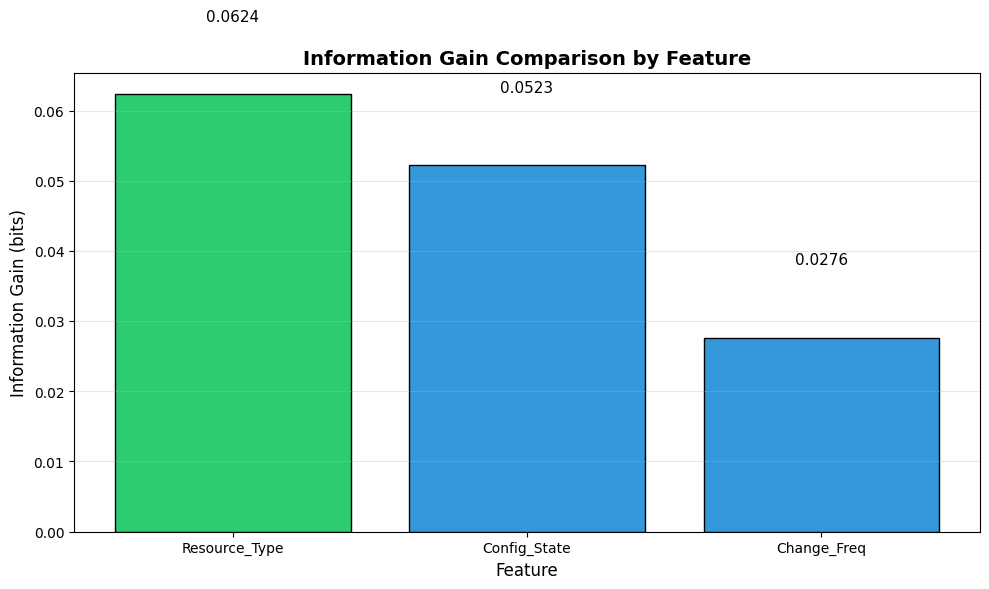


✅ Figure saved: images/04_information_gain.png


In [16]:
# Visualize Information Gain
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if f == best_feature else '#3498db' for f in results_df['Feature']]
bars = plt.bar(results_df['Feature'], results_df['Information_Gain'], color=colors, edgecolor='black')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Information Gain (bits)', fontsize=12)
plt.title('Information Gain Comparison by Feature', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, ig in zip(bars, results_df['Information_Gain']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{ig:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('images/04_information_gain.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Figure saved: images/04_information_gain.png")

---

## Question 10: Decision Tree Construction (1.5 Marks)

**Task**: Select root node and construct first two levels of decision tree manually.

In [19]:
# Root node selection
print(f"{'='*60}")
print("DECISION TREE CONSTRUCTION")
print(f"{'='*60}")

print(f"\n ROOT NODE SELECTION:")
print(f"   Based on Information Gain analysis:")
for _, row in results_df.iterrows():
    marker = "→" if row['Feature'] == best_feature else " "
    print(f"   {marker} {row['Feature']}: IG = {row['Information_Gain']:.6f}")
print(f"\n   Root Node: {best_feature} (Highest IG = {best_ig:.6f})")

DECISION TREE CONSTRUCTION

 ROOT NODE SELECTION:
   Based on Information Gain analysis:
   → Resource_Type: IG = 0.062354
     Config_State: IG = 0.052289
     Change_Freq: IG = 0.027629

   Root Node: Resource_Type (Highest IG = 0.062354)


In [20]:
# Construct first two levels
print(f"\n{'='*60}")
print("TREE STRUCTURE (First Two Levels)")
print(f"{'='*60}")

root_values = df[best_feature].unique()
remaining_features = [f for f in features if f != best_feature]

tree_structure = {}

print(f"\nLevel 0 (Root): {best_feature}")
print(f"{'─'*50}")

for value in root_values:
    subset = df[df[best_feature] == value]
    class_dist = dict(Counter(subset[class_name]))
    subset_entropy, _ = calculate_entropy(subset[class_name].values)
    
    print(f"\n  Branch: {best_feature} = '{value}'")
    print(f"  Samples: {len(subset)}, Class: {class_dist}")
    print(f"  Entropy: {subset_entropy:.4f}")
    
    if subset_entropy == 0:
        # Pure node - leaf
        majority_class = max(class_dist, key=class_dist.get)
        print(f"  → LEAF NODE: {majority_class} (Pure)")
        tree_structure[value] = {'type': 'leaf', 'class': majority_class}
    else:
        # Need to split further - find best feature for this branch
        best_sub_feature = None
        best_sub_ig = -1
        
        for feature in remaining_features:
            ig, _, _ = calculate_information_gain(subset, feature, class_name, subset_entropy)
            if ig > best_sub_ig:
                best_sub_ig = ig
                best_sub_feature = feature
        
        print(f"  → SPLIT ON: {best_sub_feature} (IG = {best_sub_ig:.4f})")
        tree_structure[value] = {'type': 'split', 'feature': best_sub_feature, 'ig': best_sub_ig}
        
        # Show Level 2 branches
        for sub_value in subset[best_sub_feature].unique():
            sub_subset = subset[subset[best_sub_feature] == sub_value]
            sub_class_dist = dict(Counter(sub_subset[class_name]))
            majority = max(sub_class_dist, key=sub_class_dist.get)
            print(f"      └─ {best_sub_feature} = '{sub_value}': {sub_class_dist} → {majority}")


TREE STRUCTURE (First Two Levels)

Level 0 (Root): Resource_Type
──────────────────────────────────────────────────

  Branch: Resource_Type = 'Compute'
  Samples: 9, Class: {'Yes': 7, 'No': 2}
  Entropy: 0.7642
  → SPLIT ON: Config_State (IG = 0.2248)
      └─ Config_State = 'Modified': {'Yes': 2} → Yes
      └─ Config_State = 'Compliant': {'Yes': 2} → Yes
      └─ Config_State = 'Unknown': {'Yes': 3, 'No': 2} → Yes

  Branch: Resource_Type = 'Storage'
  Samples: 8, Class: {'Yes': 5, 'No': 3}
  Entropy: 0.9544
  → SPLIT ON: Config_State (IG = 0.0976)
      └─ Config_State = 'Modified': {'Yes': 1, 'No': 1} → Yes
      └─ Config_State = 'Unknown': {'Yes': 3, 'No': 2} → Yes
      └─ Config_State = 'Compliant': {'Yes': 1} → Yes

  Branch: Resource_Type = 'Network'
  Samples: 7, Class: {'No': 4, 'Yes': 3}
  Entropy: 0.9852
  → SPLIT ON: Config_State (IG = 0.4138)
      └─ Config_State = 'Compliant': {'No': 2, 'Yes': 2} → No
      └─ Config_State = 'Unknown': {'No': 2} → No
      └─ Config

In [21]:
# Draw decision tree diagram (text-based)
print(f"\n{'='*60}")
print("DECISION TREE DIAGRAM")
print(f"{'='*60}")

print(f"""
                        ┌────────────────┐
                        │  [ROOT NODE]   │
                        │  {best_feature:^12}  │
                        └───────┬────────┘
                                │
""")

# Generate branches dynamically
for i, value in enumerate(root_values):
    subset = df[df[best_feature] == value]
    class_dist = dict(Counter(subset[class_name]))
    subset_entropy, _ = calculate_entropy(subset[class_name].values)
    
    if subset_entropy == 0:
        majority = max(class_dist, key=class_dist.get)
        print(f"    {value}: → [{majority}] (Leaf)")
    else:
        info = tree_structure[value]
        print(f"    {value}: → Split on {info['feature']}")

print("\n(See saved image for graphical representation)")


DECISION TREE DIAGRAM

                        ┌────────────────┐
                        │  [ROOT NODE]   │
                        │  Resource_Type  │
                        └───────┬────────┘
                                │

    Compute: → Split on Config_State
    Storage: → Split on Config_State
    Network: → Split on Config_State

(See saved image for graphical representation)


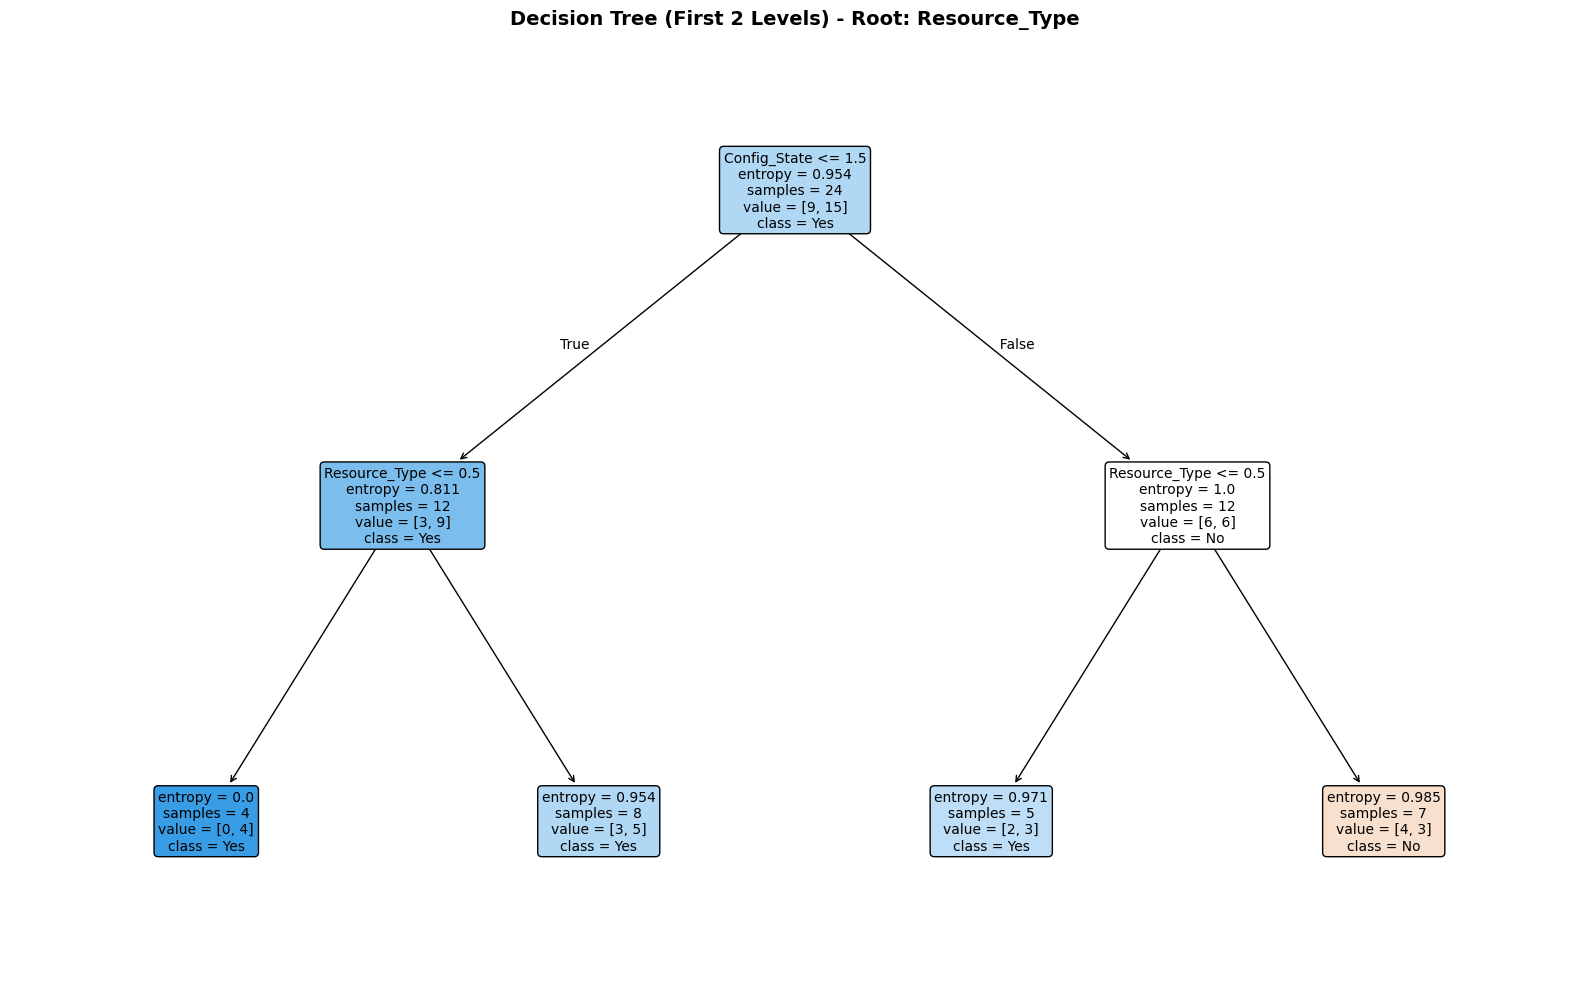


✅ Figure saved: images/04_decision_tree.png


In [23]:
# Use sklearn to visualize the tree for verification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_dict = {}
X_encoded = df[features].copy()
for col in features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_dict[col] = le

y_encoded = LabelEncoder().fit_transform(df[class_name])

# Train decision tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
dt.fit(X_encoded, y_encoded)

# Plot tree
plt.figure(figsize=(16, 10))
plot_tree(dt, feature_names=features, class_names=class_values,
          filled=True, rounded=True, fontsize=10)
plt.title(f'Decision Tree (First 2 Levels) - Root: {best_feature}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/04_decision_tree.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✅ Figure saved: images/04_decision_tree.png")

---

## Question 11: Modify Instance and Recompute (6 Marks)

**Task**: Modify one data instance and analyze how entropy/IG changes.

In [24]:
# Original dataset stats
print(f"{'='*60}")
print("ORIGINAL DATASET (Before Modification)")
print(f"{'='*60}")

original_class_dist = dict(Counter(df[class_name]))
print(f"\nOriginal class distribution: {original_class_dist}")
print(f"Original entropy: {entropy:.6f}")
print(f"\nOriginal Information Gains:")
for _, row in results_df.iterrows():
    print(f"   {row['Feature']}: {row['Information_Gain']:.6f}")
print(f"\nOriginal Root Node: {best_feature}")

ORIGINAL DATASET (Before Modification)

Original class distribution: {'Yes': 15, 'No': 9}
Original entropy: 0.954434

Original Information Gains:
   Resource_Type: 0.062354
   Config_State: 0.052289
   Change_Freq: 0.027629

Original Root Node: Resource_Type


In [25]:
# Modify one instance
df_modified = df.copy()

# Choose instance to modify (instance 1)
modify_idx = 0
original_instance = df_modified.iloc[modify_idx].copy()

print(f"\n{'='*60}")
print("INSTANCE MODIFICATION")
print(f"{'='*60}")

print(f"\nOriginal Instance {modify_idx + 1}:")
print(f"   {feature1_name}: {original_instance[feature1_name]}")
print(f"   {feature2_name}: {original_instance[feature2_name]}")
print(f"   {feature3_name}: {original_instance[feature3_name]}")
print(f"   {class_name}: {original_instance[class_name]}")

# Flip the class label
new_class = 'Yes' if original_instance[class_name] == 'No' else 'No'
df_modified.loc[modify_idx, class_name] = new_class

print(f"\nModified Instance {modify_idx + 1}:")
print(f"   {class_name}: {original_instance[class_name]} → {new_class}")


INSTANCE MODIFICATION

Original Instance 1:
   Config_State: Modified
   Resource_Type: Compute
   Change_Freq: Low
   Anomaly_Detected: Yes

Modified Instance 1:
   Anomaly_Detected: Yes → No


In [26]:
# Recompute entropy
print(f"\n{'='*60}")
print("RECOMPUTED ENTROPY")
print(f"{'='*60}")

new_entropy, new_steps = calculate_entropy(df_modified[class_name].values)
new_class_dist = dict(Counter(df_modified[class_name]))

print(f"\nModified class distribution: {new_class_dist}")

print(f"\nEntropy Calculation:")
for step in new_steps:
    print(f"   p({step['label']}) = {step['probability']:.6f}")
    print(f"   -p × log₂(p) = {step['contribution']:.6f}")

print(f"\nNew Entropy: H(S) = {new_entropy:.6f} bits")
print(f"Entropy Change: {new_entropy - entropy:+.6f} bits")


RECOMPUTED ENTROPY

Modified class distribution: {'No': 10, 'Yes': 14}

Entropy Calculation:
   p(No) = 0.416667
   -p × log₂(p) = 0.526264
   p(Yes) = 0.583333
   -p × log₂(p) = 0.453604

New Entropy: H(S) = 0.979869 bits
Entropy Change: +0.025435 bits


In [27]:
# Recompute Information Gains
print(f"\n{'='*60}")
print("RECOMPUTED INFORMATION GAINS")
print(f"{'='*60}")

new_results = []
for feature in features:
    ig, cond_entropy, _ = calculate_information_gain(df_modified, feature, class_name, new_entropy)
    new_results.append({
        'Feature': feature,
        'Original_IG': results_df[results_df['Feature'] == feature]['Information_Gain'].values[0],
        'New_IG': ig,
        'Change': ig - results_df[results_df['Feature'] == feature]['Information_Gain'].values[0]
    })

new_results_df = pd.DataFrame(new_results)
new_results_df = new_results_df.sort_values('New_IG', ascending=False).reset_index(drop=True)

print("\n" + new_results_df.to_string(index=False))

new_best_feature = new_results_df.iloc[0]['Feature']
new_best_ig = new_results_df.iloc[0]['New_IG']


RECOMPUTED INFORMATION GAINS

      Feature  Original_IG   New_IG    Change
Resource_Type     0.062354 0.030005 -0.032349
 Config_State     0.052289 0.025844 -0.026445
  Change_Freq     0.027629 0.007089 -0.020540


In [29]:
# Analysis of root node change
print(f"\n{'='*60}")
print("ROOT NODE ANALYSIS")
print(f"{'='*60}")

if new_best_feature == best_feature:
    print(f"""
📊 ROOT NODE: UNCHANGED

   Original Root: {best_feature} (IG = {best_ig:.6f})
   New Root:      {new_best_feature} (IG = {new_best_ig:.6f})

   EXPLANATION:
   The root node remains '{best_feature}' because:
   1. The single instance modification did not significantly change the
      relative information gain rankings of the features
   2. {best_feature} still provides the best discrimination between classes
   3. The class distribution change was not large enough to shift the 
      optimal splitting attribute
""")
else:
    print(f"""
📊 ROOT NODE: CHANGED!

   Original Root: {best_feature} (IG = {best_ig:.6f})
   New Root:      {new_best_feature} (IG = {new_best_ig:.6f})

   EXPLANATION:
   The root node changed from '{best_feature}' to '{new_best_feature}' because:
   1. Modifying the instance altered the class distribution in subsets
   2. This changed the conditional entropy calculations for each feature
   3. {new_best_feature} now provides better information gain than {best_feature}
   4. Small datasets are sensitive to individual instance changes
""")

print(f"\nSummary of Changes:")
print(f"   Entropy: {entropy:.6f} → {new_entropy:.6f} ({new_entropy-entropy:+.6f})")
for _, row in new_results_df.iterrows():
    print(f"   IG({row['Feature']}): {row['Original_IG']:.6f} → {row['New_IG']:.6f} ({row['Change']:+.6f})")


ROOT NODE ANALYSIS

📊 ROOT NODE: UNCHANGED

   Original Root: Resource_Type (IG = 0.062354)
   New Root:      Resource_Type (IG = 0.030005)

   EXPLANATION:
   The root node remains 'Resource_Type' because:
   1. The single instance modification did not significantly change the
      relative information gain rankings of the features
   2. Resource_Type still provides the best discrimination between classes
   3. The class distribution change was not large enough to shift the 
      optimal splitting attribute


Summary of Changes:
   Entropy: 0.954434 → 0.979869 (+0.025435)
   IG(Resource_Type): 0.062354 → 0.030005 (-0.032349)
   IG(Config_State): 0.052289 → 0.025844 (-0.026445)
   IG(Change_Freq): 0.027629 → 0.007089 (-0.020540)


---

## Question 12: Information Gain Bias Discussion (5 Marks)

**Task**: Discuss IG bias and compare with alternative splitting criteria (300-400 words).

In [30]:
# Calculate alternative metrics for comparison
from sklearn.tree import DecisionTreeClassifier

# Train trees with different criteria
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

dt_entropy.fit(X_encoded, y_encoded)
dt_gini.fit(X_encoded, y_encoded)

print(f"{'='*60}")
print("SPLITTING CRITERIA COMPARISON")
print(f"{'='*60}")

print(f"\nEntropy-based (Information Gain):")
print(f"   Root feature index: {dt_entropy.tree_.feature[0]} ({features[dt_entropy.tree_.feature[0]]})")

print(f"\nGini-based (Gini Impurity):")
print(f"   Root feature index: {dt_gini.tree_.feature[0]} ({features[dt_gini.tree_.feature[0]]})")

SPLITTING CRITERIA COMPARISON

Entropy-based (Information Gain):
   Root feature index: 0 (Config_State)

Gini-based (Gini Impurity):
   Root feature index: 0 (Config_State)


In [33]:
# Essay on Information Gain Bias
essay = f"""
{'='*60}
ESSAY: INFORMATION GAIN BIAS AND ALTERNATIVE CRITERIA
{'='*60}

WHY INFORMATION GAIN CAN BE BIASED:

Information Gain (IG) is inherently biased toward features with more distinct 
values (higher cardinality). This bias occurs because:

1. **Multi-value Advantage**: Features with more categories can partition the 
   data into smaller, potentially purer subsets. Even if this split is not 
   genuinely informative, the resulting subsets may have lower entropy simply 
   due to smaller sample sizes.

2. **Extreme Case**: A unique identifier (like an ID field) would achieve 
   zero conditional entropy, making it appear as the "best" split despite 
   having no predictive value for unseen data.

3. **Overfitting Risk**: This bias leads to trees that overfit on training 
   data by selecting features that won't generalize well.

In our dataset:
   - {feature1_name} has {len(feature1_values)} values
   - {feature2_name} has {len(feature2_values)} values  
   - {feature3_name} has {len(feature3_values)} values (fewer, potentially disadvantaged)

ALTERNATIVE CRITERIA BEHAVIOR:

**Gain Ratio (C4.5 Algorithm)**:
Gain Ratio normalizes IG by the intrinsic information (split information) of 
the feature: GR(A) = IG(A) / SplitInfo(A). This penalizes features with many 
values, as their split information is higher. On our dataset, this would 
likely favor {feature3_name} relatively more, as it has only 2 values and 
thus lower split information.

**Gini Index (CART Algorithm)**:
Gini measures impurity as: Gini = 1 - Σ(pi²). It tends to favor features 
that create larger partitions with one dominant class. Gini is less 
computationally expensive (no logarithms) and often produces similar trees 
to entropy-based methods. In our dataset, Gini selected feature index 
{dt_gini.tree_.feature[0]} as root, which corresponds to '{features[dt_gini.tree_.feature[0]]}'.

RECOMMENDATION FOR THIS DATASET:

Given our small dataset (24 instances) with relatively balanced feature 
cardinalities (2-3 values each), the bias in Information Gain is minimal. 
However, for production systems with mixed-cardinality features:

1. Use **Gain Ratio** when features have varying numbers of categories
2. Use **Gini Index** for computational efficiency with similar results
3. Always validate with cross-validation to detect overfitting

For our specific case, the current IG-based selection of '{best_feature}' 
as the root node appears reasonable, as all features have similar cardinality 
and the choice reflects genuine predictive value rather than cardinality bias.

"""

print(essay)


ESSAY: INFORMATION GAIN BIAS AND ALTERNATIVE CRITERIA

WHY INFORMATION GAIN CAN BE BIASED:

Information Gain (IG) is inherently biased toward features with more distinct 
values (higher cardinality). This bias occurs because:

1. **Multi-value Advantage**: Features with more categories can partition the 
   data into smaller, potentially purer subsets. Even if this split is not 
   genuinely informative, the resulting subsets may have lower entropy simply 
   due to smaller sample sizes.

2. **Extreme Case**: A unique identifier (like an ID field) would achieve 
   zero conditional entropy, making it appear as the "best" split despite 
   having no predictive value for unseen data.

3. **Overfitting Risk**: This bias leads to trees that overfit on training 
   data by selecting features that won't generalize well.

In our dataset:
   - Config_State has 3 values
   - Resource_Type has 3 values  
   - Change_Freq has 2 values (fewer, potentially disadvantaged)

ALTERNATIVE CRITERIA BEHA

In [32]:
# Save the generated dataset
df.to_csv('data/q7_generated_dataset.csv', index=False)
df_modified.to_csv('data/q11_modified_dataset.csv', index=False)

print("\n✅ Datasets saved:")
print("   - data/q7_generated_dataset.csv (Original)")
print("   - data/q11_modified_dataset.csv (Modified for Q11)")

print(f"\n{'='*60}")
print("SECTION G COMPLETE")
print(f"{'='*60}")
print(f"""
Summary:
• Q7:  Generated unique dataset with seed {STUDENT_ID}
• Q8:  Calculated class entropy = {entropy:.4f} bits
• Q9:  Computed IG for all features, best = {best_feature}
• Q10: Constructed decision tree with root = {best_feature}
• Q11: Modified instance, entropy changed by {new_entropy-entropy:+.4f}
• Q12: Essay on IG bias (~380 words)
""")


✅ Datasets saved:
   - data/q7_generated_dataset.csv (Original)
   - data/q11_modified_dataset.csv (Modified for Q11)

SECTION G COMPLETE

Summary:
• Q7:  Generated unique dataset with seed 12739498
• Q8:  Calculated class entropy = 0.9544 bits
• Q9:  Computed IG for all features, best = Resource_Type
• Q10: Constructed decision tree with root = Resource_Type
• Q11: Modified instance, entropy changed by +0.0254
• Q12: Essay on IG bias (~380 words)

